## t-SNE


In [1]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

%matplotlib inline

In [2]:
train=pd.read_csv('../1. Task and Data/train.csv',sep='|')
test=pd.read_csv('../1. Task and Data/test.csv',sep='|')

In [3]:
print(train.fraud.value_counts())
print(train.fraud.value_counts() / len(train))

0    1775
1     104
Name: fraud, dtype: int64
0    0.944651
1    0.055349
Name: fraud, dtype: float64


In [4]:
# for training set

train['scannedLineItems'] = train['scannedLineItemsPerSecond'] * train['totalScanTimeInSeconds']
train['pricePerScannedLineItem'] = train['grandTotal'] / train['scannedLineItems']
train['scansWithoutRegistrationPerScannedLineItem'] = train['scansWithoutRegistration'] / train['scannedLineItems']
train['quantityModificationsPerScannedLineItem'] = train['quantityModifications'] / train['scannedLineItems']
train['lineItemVoidsPerSecond'] = train['lineItemVoids'] / train['totalScanTimeInSeconds']
train['scansWithoutRegistrationPerSecond'] = train['scansWithoutRegistration'] / train['totalScanTimeInSeconds']
train['quantityModificationsPerSecond'] = train['quantityModifications'] / train['totalScanTimeInSeconds']
train['secondsPerEuro'] = train['totalScanTimeInSeconds'] / train['grandTotal']
train['lineItemVoidsPerEuro'] = train['lineItemVoids'] / train['grandTotal']
train['scansWithoutRegistrationPerEuro'] = train['scansWithoutRegistration'] / train['grandTotal']
train['quantityModificationsPerEuro'] = train['quantityModifications'] / train['grandTotal']


# for test set

test['scannedLineItems'] = test['scannedLineItemsPerSecond'] * test['totalScanTimeInSeconds']
test['pricePerScannedLineItem'] = test['grandTotal'] / test['scannedLineItems']
test['scansWithoutRegistrationPerScannedLineItem'] = test['scansWithoutRegistration'] / test['scannedLineItems']
test['quantityModificationsPerScannedLineItem'] = test['quantityModifications'] / test['scannedLineItems']
test['lineItemVoidsPerSecond'] = test['lineItemVoids'] / test['totalScanTimeInSeconds']
test['scansWithoutRegistrationPerSecond'] = test['scansWithoutRegistration'] / test['totalScanTimeInSeconds']
test['quantityModificationsPerSecond'] = test['quantityModifications'] / test['totalScanTimeInSeconds']
test['secondsPerEuro'] = test['totalScanTimeInSeconds'] / test['grandTotal']
test['lineItemVoidsPerEuro'] = test['lineItemVoids'] / test['grandTotal']
test['scansWithoutRegistrationPerEuro'] = test['scansWithoutRegistration'] / test['grandTotal']
test['quantityModificationsPerEuro'] = test['quantityModifications'] / test['grandTotal']

In [5]:
train.shape

(1879, 21)

In [6]:
train.head()

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud,...,pricePerScannedLineItem,scansWithoutRegistrationPerScannedLineItem,quantityModificationsPerScannedLineItem,lineItemVoidsPerSecond,scansWithoutRegistrationPerSecond,quantityModificationsPerSecond,secondsPerEuro,lineItemVoidsPerEuro,scansWithoutRegistrationPerEuro,quantityModificationsPerEuro
0,5,1054,54.70,7,0,3,0.027514,0.051898,0.241379,0,...,1.886207,0.000000,0.103448,0.006641,0.000000,0.002846,19.268739,0.127971,0.000000,0.054845
1,3,108,27.36,5,2,4,0.129630,0.253333,0.357143,0,...,1.954286,0.142857,0.285714,0.046296,0.018519,0.037037,3.947368,0.182749,0.073099,0.146199
2,3,1516,62.16,3,10,5,0.008575,0.041003,0.230769,0,...,4.781538,0.769231,0.384615,0.001979,0.006596,0.003298,24.388674,0.048263,0.160875,0.080438
3,6,1791,92.31,8,4,4,0.016192,0.051541,0.275862,0,...,3.183103,0.137931,0.137931,0.004467,0.002233,0.002233,19.402015,0.086665,0.043332,0.043332
4,5,430,81.53,3,7,2,0.062791,0.189605,0.111111,0,...,3.019630,0.259259,0.074074,0.006977,0.016279,0.004651,5.274132,0.036796,0.085858,0.024531


In [7]:
train.describe()

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud,...,pricePerScannedLineItem,scansWithoutRegistrationPerScannedLineItem,quantityModificationsPerScannedLineItem,lineItemVoidsPerSecond,scansWithoutRegistrationPerSecond,quantityModificationsPerSecond,secondsPerEuro,lineItemVoidsPerEuro,scansWithoutRegistrationPerEuro,quantityModificationsPerEuro
count,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,...,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000
mean,3.401809,932.153273,50.864492,5.469931,4.904204,2.525279,0.058138,0.201746,0.745404,0.055349,...,7.067227,0.681185,0.358495,0.022530,0.020324,0.010429,153.435326,1.053188,0.825982,0.183389
std,1.709404,530.144640,28.940202,3.451169,3.139697,1.695472,0.278512,1.242135,1.327241,0.228720,...,12.198532,1.205101,0.669294,0.132777,0.136699,0.063322,3477.973838,23.989756,18.910695,1.699509
min,1.000000,2.000000,0.010000,0.000000,0.000000,0.000000,0.000548,0.000007,0.000000,0.000000,...,0.001111,0.000000,0.000000,0.000000,0.000000,0.000000,0.026406,0.000000,0.000000,0.000000
25%,2.000000,474.500000,25.965000,2.000000,2.000000,1.000000,0.008384,0.027787,0.160000,0.000000,...,1.680123,0.142857,0.066667,0.002585,0.002314,0.001102,9.318717,0.048948,0.042703,0.020189
50%,3.000000,932.000000,51.210000,5.000000,5.000000,3.000000,0.016317,0.054498,0.350000,0.000000,...,3.313000,0.333333,0.166667,0.005797,0.005263,0.002671,18.349359,0.105362,0.095724,0.050120
75%,5.000000,1397.000000,77.285000,8.000000,8.000000,4.000000,0.032594,0.107313,0.666667,0.000000,...,6.532444,0.630682,0.333333,0.011554,0.010759,0.005329,35.988238,0.212756,0.192697,0.100218
max,6.000000,1831.000000,99.960000,11.000000,10.000000,5.000000,6.666667,37.870000,11.000000,1.000000,...,95.580000,10.000000,5.000000,3.000000,4.500000,2.000000,147300.000000,1000.000000,800.000000,66.666667


In [8]:
# Imputation of NaN and Infinity values
test.loc[test['grandTotal'] == 0.00, 'secondsPerEuro'] = test['totalScanTimeInSeconds'] / 0.01
test.loc[test['grandTotal'] == 0.00, 'lineItemVoidsPerEuro'] = test['lineItemVoids'] / 0.01
test.loc[test['grandTotal'] == 0.00, 'scansWithoutRegistrationPerEuro'] = test['scansWithoutRegistration'] / 0.01
test.loc[test['grandTotal'] == 0.00, 'quantityModificationsPerEuro'] = test['quantityModifications'] / 0.01

In [ ]:
#Creating a third label for unlabeled data = 2
df["fraud"] = 'default value'

In [9]:
#data = pd.concat([train, test], ignore_index=True, sort=False)
#data.describe()
data = train

Attention: I only apply logscaling for the training set yet. Needs to be changed for overlaying both data sets

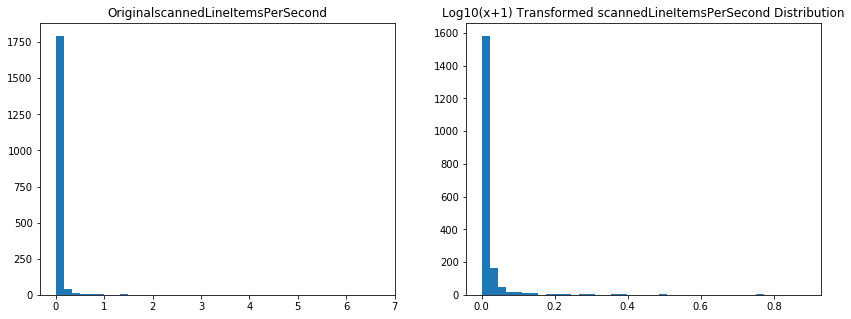

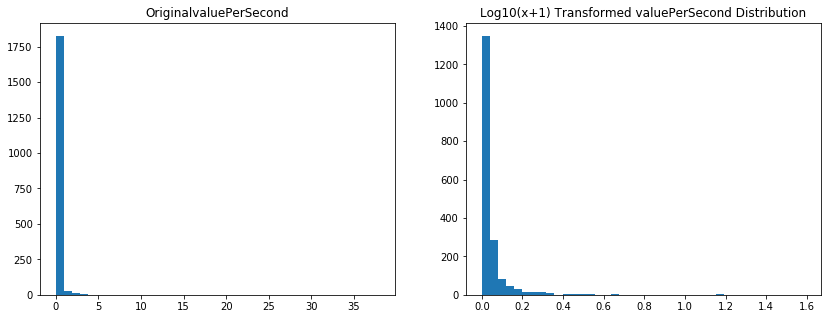

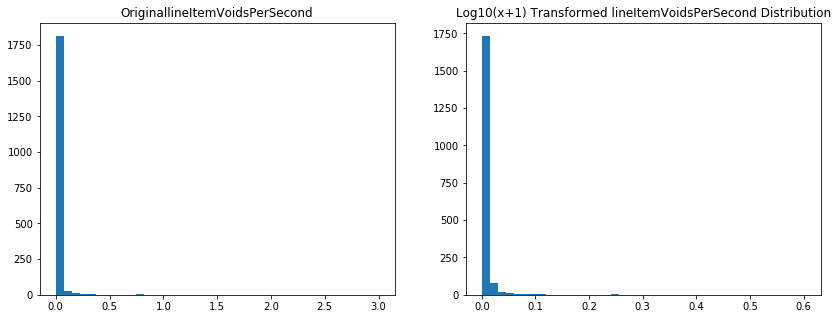

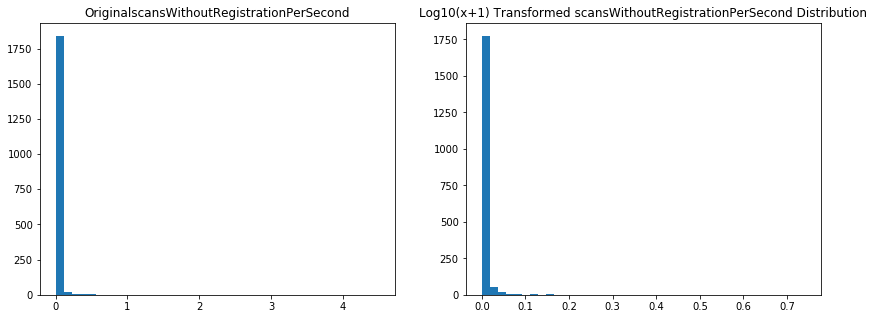

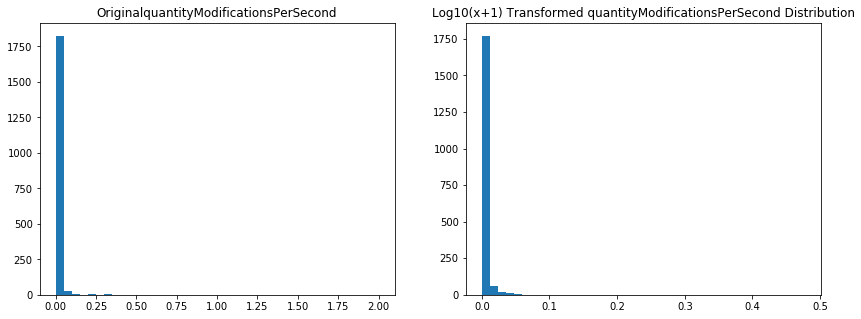

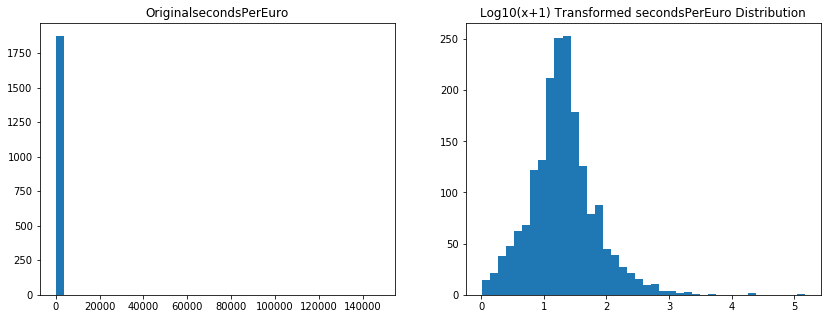

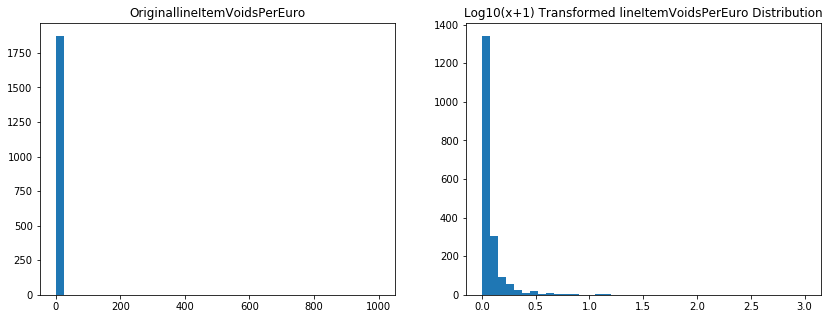

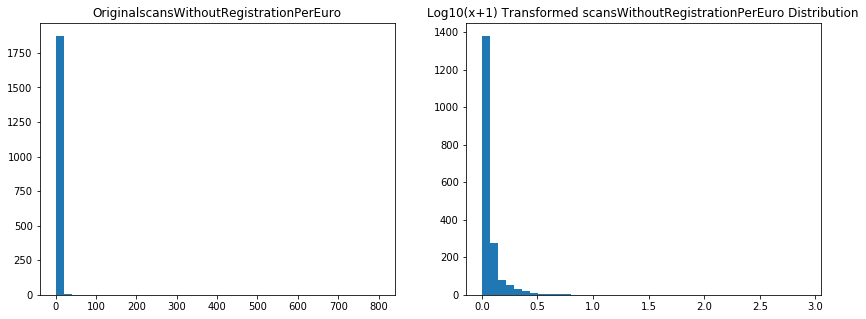

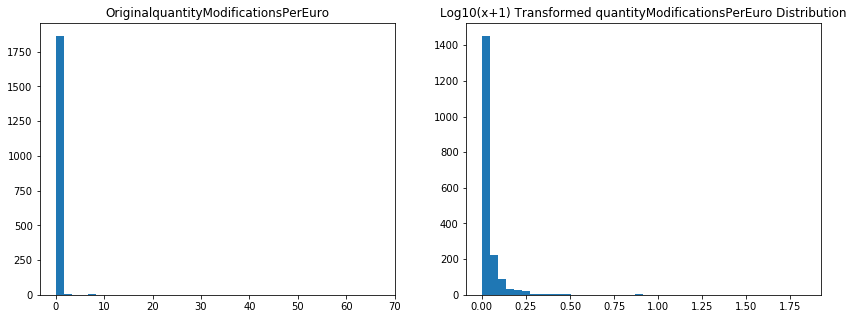

In [15]:
# Log transform amount values to give more normal distribution

LogFeatures = ['scannedLineItemsPerSecond','valuePerSecond','lineItemVoidsPerSecond','scansWithoutRegistrationPerSecond','quantityModificationsPerSecond',
'secondsPerEuro','lineItemVoidsPerEuro','scansWithoutRegistrationPerEuro','quantityModificationsPerEuro']

for i in LogFeatures:
    #Print original distribution
    plt.figure(figsize=(14,5))
    plt.subplot(1,2,1)
    plt.hist(data[i], bins=40)
    plt.title('Original' + i)

    #Print transformed distribution
    plt.subplot(1,2,2)
    d0 = np.log10( data[i].values + 1 )
    # d0 = np.log1p( data['Amount'].values ) / np.log(10)
    plt.hist( d0, bins=40 )
    plt.title('Log10(x+1) Transformed '  + i + ' Distribution')
    plt.show()
    
    #Replace with transformed data in dataset
    data[i] = d0

## UnderSampling the DataSet to apply t-SNE

### Approach:
### UnderSampling the data to nearly imbalanced and balanced datasets seperately to apply tsne.





### 1) Applied t-SNE to Nearly Balanced DataSet by UnderSampling under different parameters of t-SNE.



In [16]:
# underSampleRatio -> fraud/normal
def UnderSampleData(data,underSampleRatio):

    # Number of data points in the minority class
    fraudrecords = len(data[data.fraud == 1])
    fraudindices = np.array(data[data.fraud == 1].index)
    # Picking the indices of the normal classes
    normalindices = data[data.fraud == 0].index
    
    samples=(fraudrecords)/underSampleRatio
    
    randomnormalindices = np.random.choice(normalindices, int(samples), replace = False)
    randomnormalindices = np.array(randomnormalindices)

    # Appending the 2 indices
    undersampleindices = np.concatenate([fraudindices,randomnormalindices])

    # Under sample dataset
    undersampledata = data.iloc[undersampleindices,:]
    return undersampledata

In [17]:
def standardize(X):
    # Data-preprocessing: Standardizing the data
    from sklearn.preprocessing import StandardScaler
    standardized_data = StandardScaler().fit_transform(X)
    ## stddata - data which is standardized
    stddata = pd.DataFrame(standardized_data, columns = X.columns)
    return stddata

In [18]:
def TSNEModel(perplexity,iterations,sampledata):
    from sklearn.manifold import TSNE
    model = TSNE(n_components=2, random_state=0,perplexity=perplexity,n_iter=iterations)
    # save the labels into a variable y.
    y = sampledata['fraud']
    # Drop the label feature,store the  data in X.
    X = sampledata.drop("fraud",axis=1)
    # creating a new data frame which help us in ploting the result data
    tsne_data = model.fit_transform(X) 
    tsne_data = np.vstack((tsne_data.T, y)).T
    tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))
    # Ploting the result of tsne
    sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
    str="With perplexity = {0}, n_iter = {1}".format(perplexity, iterations)
    plt.title(str)   
    plt.show()

In [19]:
# Standardize the dataSet
# save the labels into a variable y.
y = data['fraud']
# Drop the label feature, standardize the data and store the  data in X.
X = standardize(data.drop("fraud",axis=1))
stddata = pd.concat([X, y], axis=1)


In [ ]:
ImbalanceSample=UnderSampleData(stddata,0.2)  ## sample the unbalanced dataset in to nearly imbalance

C:\Users\z004032b\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


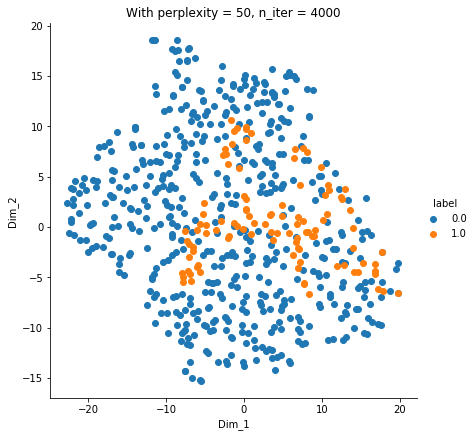

In [20]:
TSNEModel(50,4000,ImbalanceSample)

C:\Users\z004032b\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


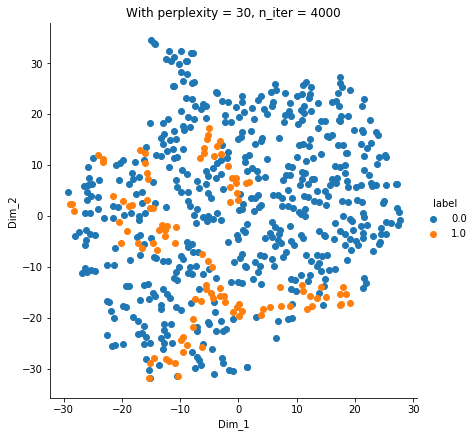

In [21]:
TSNEModel(30,4000,ImbalanceSample)

C:\Users\z004032b\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


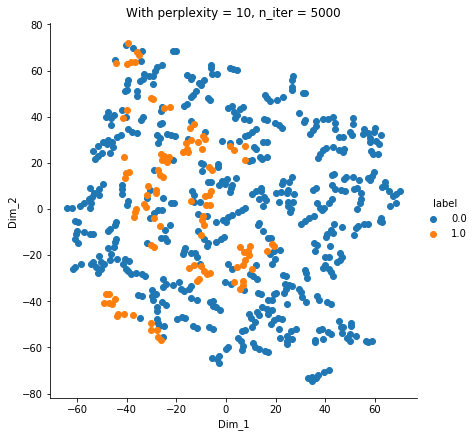

In [22]:
TSNEModel(10,5000,ImbalanceSample)

C:\Users\z004032b\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


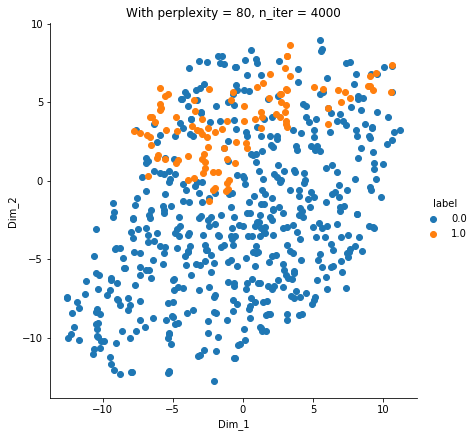

In [27]:
TSNEModel(80,4000,ImbalanceSample)

#### From the t-SNE plots, it seems fraud transactions are seperated from normal transactions more or less.

### 2) Applied t-SNE to perfectly Balanced Dataset by varying different parameters of t-SNE.

In [23]:
balanceSample=UnderSampleData(stddata,1)  ## sample the unbalanced dataset in to perfectly balance


C:\Users\z004032b\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


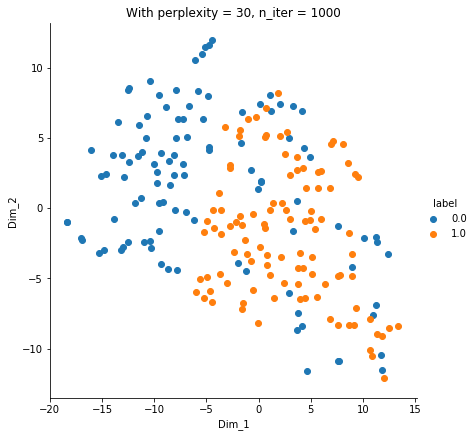

In [24]:
TSNEModel(30,1000,balanceSample)

C:\Users\z004032b\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


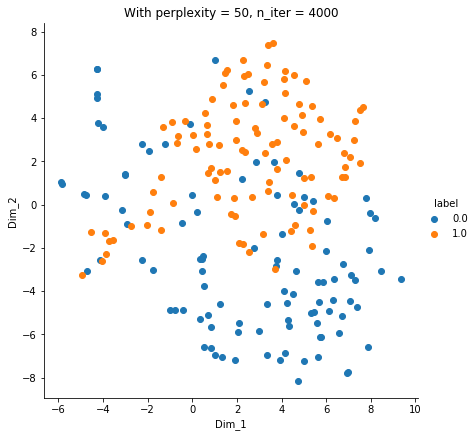

In [25]:
TSNEModel(50,4000,balanceSample)

C:\Users\z004032b\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


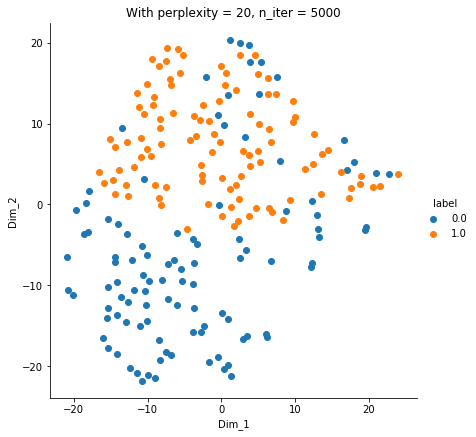

In [26]:
TSNEModel(20,5000,balanceSample)